In [49]:
import pandas as pd
student_data = pd.read_csv('student_details_csv.csv')

In [50]:
features = ['Gender', 'Degree', 'Income', 'Family_size ', 'Objective', 'Study_pattern', 'Time_spent_pattern', 'Extra_curricular_activity', 'Paused_resumed']

In [51]:
#cleaning by dropping rows with missing values
student_data_cleaned = student_data.copy()

#family size
student_data_cleaned['Family_size '] = student_data_cleaned['Family_size '].apply(lambda x: 6 if x == 'above 5' else x )
student_data_cleaned.to_csv('cleaned.csv', index=False)
student_data_cleaned.head()


,Reg_no,Gender,Degree,Tenth_marks,Eleventh_marks,Twelfth_marks,Income,Family_size,Objective,Study_pattern,Time_spent_pattern,Extra_curricular_activity,Paused_resumed
0,st101,Female,II PU/12th,90.8,91.1,93.6,"Upper middle income ( 1,00,000 - 2,00,000)",3,"Yes, clear and specific.",4-6 days/week,3-4 hrs,Sports and Physical Activities,Paused and resumed due to academics.
1,st102,Male,II PU/12th,88.5,93,94.3,"Upper middle income ( 1,00,000 - 2,00,000)",4,Not specific enough.,2-3 days/week,1-2 hrs,Sports and Physical Activities,Completely stopped because of academics.
2,st103,Female,II PU/12th,98.8,97.3,97.8,"Middle income (50,000 - 1,00, 000)",4,"Yes, clear and specific.",Everyday,2-3 hrs,Others,Paused and resumed due to academics.
3,st104,Female,II PU/12th,90.8,96,92.0,"High income ( > 2,00,000)",6,"Yes, clear and specific.",4-6 days/week,2-3 hrs,Arts and Culture,Paused and resumed due to academics.
4,st105,Male,II PU/12th,90.6,91,96.0,"Upper middle income ( 1,00,000 - 2,00,000)",5,Not specific enough.,2-3 days/week,1-2 hrs,Sports and Physical Activities,Paused and resumed due to academics.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

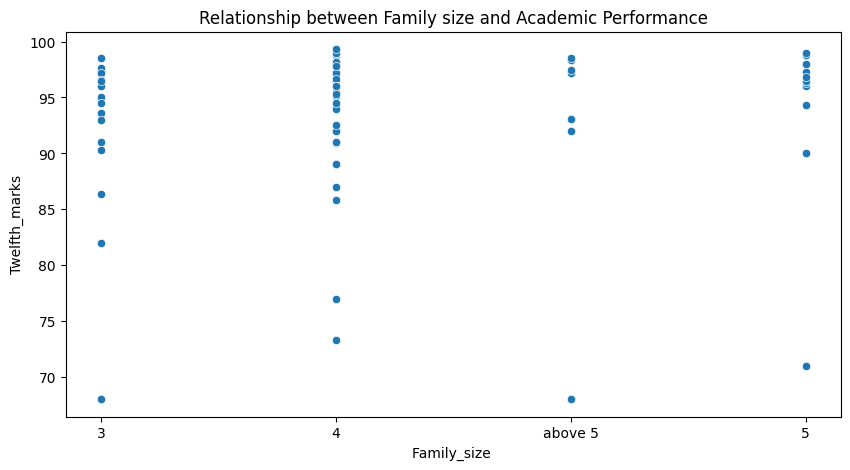

In [53]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Family_size ', y='Twelfth_marks', data=student_data)
plt.title('Relationship between Family size and Academic Performance')
plt.show()
#shows that when the family is big the performance drops

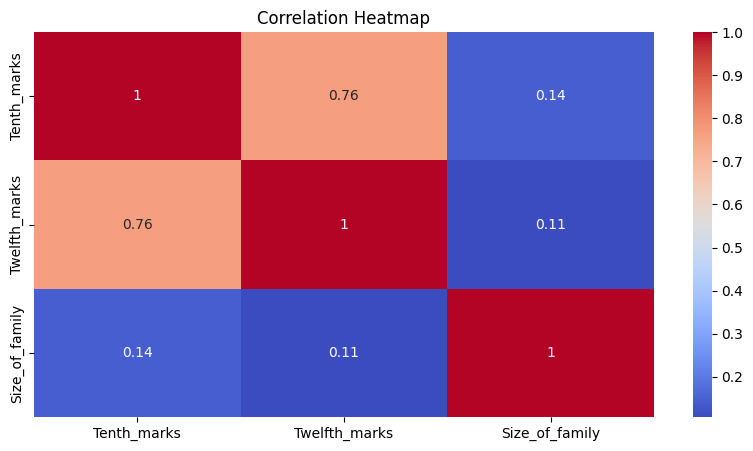

In [54]:
data = student_data_cleaned
data.dropna(inplace=True)
data['Size_of_family'] = data['Family_size '].astype('category').cat.codes
# Select only relevant numerical columns for correlation matrix
correlation_data = data[['Tenth_marks', 'Twelfth_marks', 'Size_of_family']]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [55]:
from statsmodels.formula.api import ols
data['Study_pattern'] = data['Study_pattern'].astype('category').cat.codes
model = ols('Twelfth_marks ~ Size_of_family + Tenth_marks', data=data).fit()
print("\nLinear Regression Summary:\n", model.summary())


Linear Regression Summary:
                             OLS Regression Results                            
Dep. Variable:          Twelfth_marks   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     49.59
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           3.33e-14
Time:                        16:27:24   Log-Likelihood:                -215.23
No. Observations:                  74   AIC:                             436.5
Df Residuals:                      71   BIC:                             443.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
# Convert categorical columns to numeric codes for regression and training
data['Family_size_result'] = data['Family_size '].astype('category').cat.codes
X = data[['Family_size_result', 'Tenth_marks']] #independent values - predictors
y = data['Twelfth_marks'] #dependent values - response

model = ols('Twelfth_marks ~ Family_size_result + Tenth_marks', data=data).fit()

In [58]:
data['Predicted_Twelfth_marks'] = model.predict(X)

In [63]:
# Calculate the regression metrics
mae = mean_absolute_error(y, data['Predicted_Twelfth_marks'])
mse = mean_squared_error(y, data['Predicted_Twelfth_marks'])
rmse = np.sqrt(mse)
r2 = r2_score(y, data['Predicted_Twelfth_marks'])
print("Mean Absolute Error:     ",mae)
print("Mean Sqaured Error:      ",mse)
print("Root Mean Squared Error: ",rmse)
print("R Squared Error:         ",r2)

Mean Absolute Error:      3.1508930994456463
Mean Sqaured Error:       19.67276979982367
Root Mean Squared Error:  4.435399621209307
R Squared Error:          0.5827907247371016
